# 📊 Task 2 — Exploratory Data Analysis (EDA)

This notebook is part of my **Codveda Data Analytics Internship (Level 1 - Basic)**.  
The goal of this task is to **explore the Iris dataset**, generate summary statistics, and uncover key patterns through descriptive analysis and simple visualizations.

## ✅ Objectives
- Load the cleaned dataset (from Task 1)  
- Generate overall and group-wise summary statistics  
- Explore distributions of numeric features  
- Analyze relationships between features and target classes  
- Save outputs (summary stats, correlations) for future use

## Step 1 — Setup & Imports
### Install Dependencies

In [1]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import needed Python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

Libraries imported successfully
pandas: 2.1.3
numpy: 1.26.2


## Step 2 — Load The Cleaned Dataset

In [3]:
# Load the cleaned dataset from Task 1
df = pd.read_csv("../Task 1 - Data Cleaning And Preprocessing/Cleaned-Dataset/iris_cleaned.csv")

# Show first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3 — Dataset Overview
### 3.1 — Shape

In [4]:
# Number of rows and columns
df.shape

(147, 5)

### 3.2 — Column Info

In [5]:
# Column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 3.3 — Summary Statistics

In [6]:
# Basic statistics for numeric columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3.4 — Grouped Statistics by Species

In [7]:
# Calculate mean, std, min, max for each numeric feature grouped by species
group_stats = df.groupby("species").agg(["mean", "median", "std", "min", "max"])
group_stats

sepal_length                            sepal_width         \
                   mean median       std  min  max        mean median   
species                                                                 
setosa         5.010417    5.0  0.359219  4.3  5.8    3.431250    3.4   
versicolor     5.936000    5.9  0.516171  4.9  7.0    2.770000    2.8   
virginica      6.604082    6.5  0.632113  4.9  7.9    2.979592    3.0   

                               petal_length                             \
                 std  min  max         mean median       std  min  max   
species                                                                  
setosa      0.383243  2.3  4.4     1.462500   1.50  0.177002  1.0  1.9   
versicolor  0.313798  2.0  3.4     4.260000   4.35  0.469911  3.0  5.1   
virginica   0.323380  2.2  3.8     5.561224   5.60  0.553706  4.5  6.9   

           petal_width                             
                  mean median       std  min  max  
species                                            
setosa        0.250000    0.2  0.105185  0.1  0.6  
versicolor    1.326000    1.3  0.197753  1.0  1.8  
virginica     2.028571    2.0  0.276887  1.4  2.5

#### **Insights:**
- **Setosa** has the smallest petal length and width by far, making it easily separable.  
- **Virginica** shows the largest values across almost all features, especially petal length and width.  
- **Versicolor** lies in between setosa and virginica, acting like a "middle ground".  
- Sepal width doesn’t vary as strongly between species compared to petal measurements.  

### 3.5 — Feature Correlation Analysis

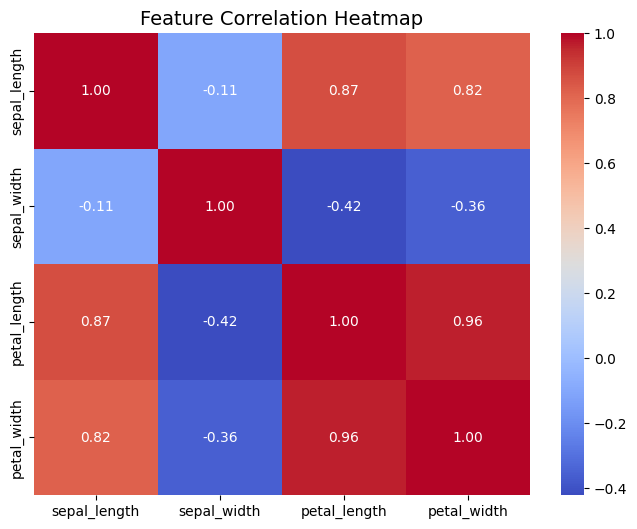

In [8]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)

# Save plot
plt.savefig("../Task 2 - Exploratory Data Analysis (EDA)/Plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

#### **Insights:**
- **Petal length** and **petal width** are **very strongly correlated (0.96)** → they carry similar information.  
- **Sepal length** also has strong positive correlation with both petal length (0.87) and petal width (0.82).  
- **Sepal width** is negatively correlated with the other features, but weaker in strength (around -0.3 to -0.4).  
- **Petal-related** features are more powerful indicators for classification compared to sepal measurements.  


### 3.6 — Feature Distributions (Histograms)

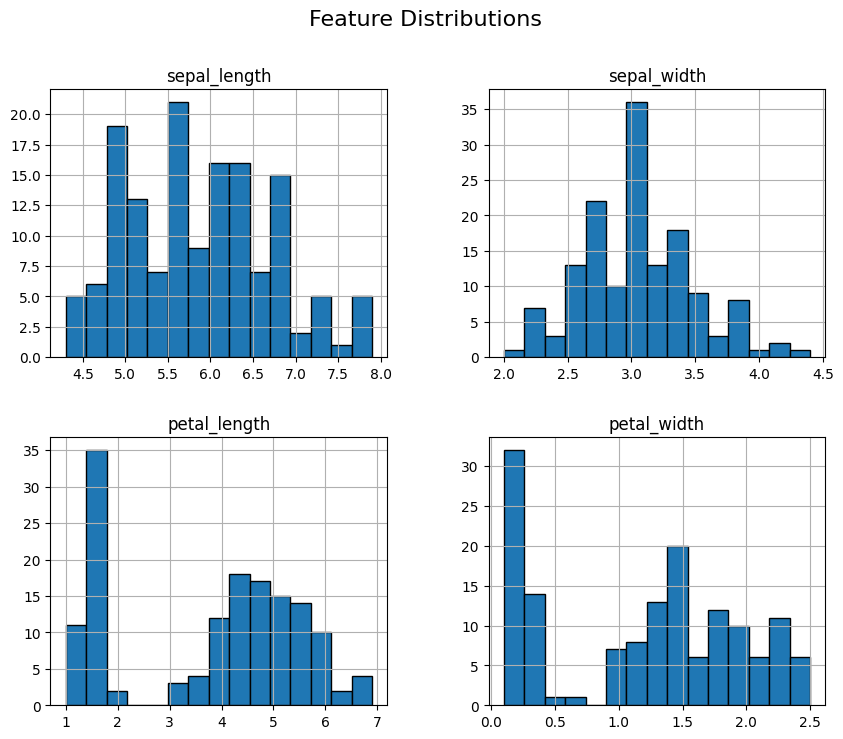

In [9]:
# Plot histograms for all numeric features
df.hist(figsize=(10,8), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)

# Save plot
plt.savefig("../Task 2 - Exploratory Data Analysis (EDA)/Plots/feature_distributions.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

### 3.7 — Pairplot by Species

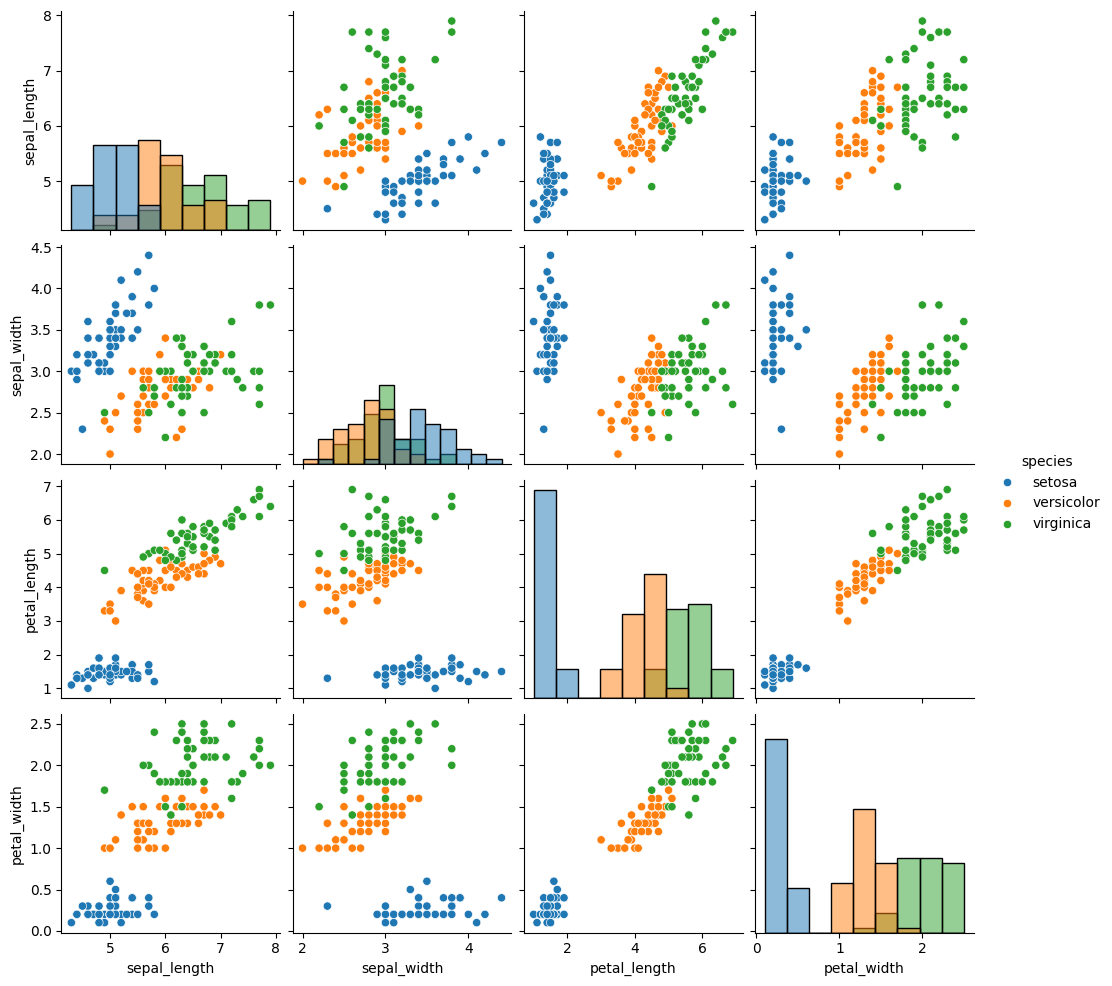

In [10]:
# Pairplot with species as hue
sns.pairplot(df, hue="species", diag_kind="hist")

# Save plot
plt.savefig("../Task 2 - Exploratory Data Analysis (EDA)/Plots/pairplot_species.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

#### **Insights from Pairplot:**
- **Setosa (blue)** is clearly separable from the other two species using petal length and width.  
- **Versicolor (orange)** and **Virginica (green)** overlap more, but still show separation on petal-based features.  
- **Sepal length** and **width** show higher overlap, making them weaker for classification.  
- **Petal** features again prove to be the strongest indicators for species differentiation.  


### 3.8 — Boxplots per Feature by Species

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9504\2268512181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_9504\2268512181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_9504\2268512181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=col, data=df, palette="Set2")
C:\Users\LEGION\AppData\Local\Temp\ipykernel_9504\2268512181.py:6: Future

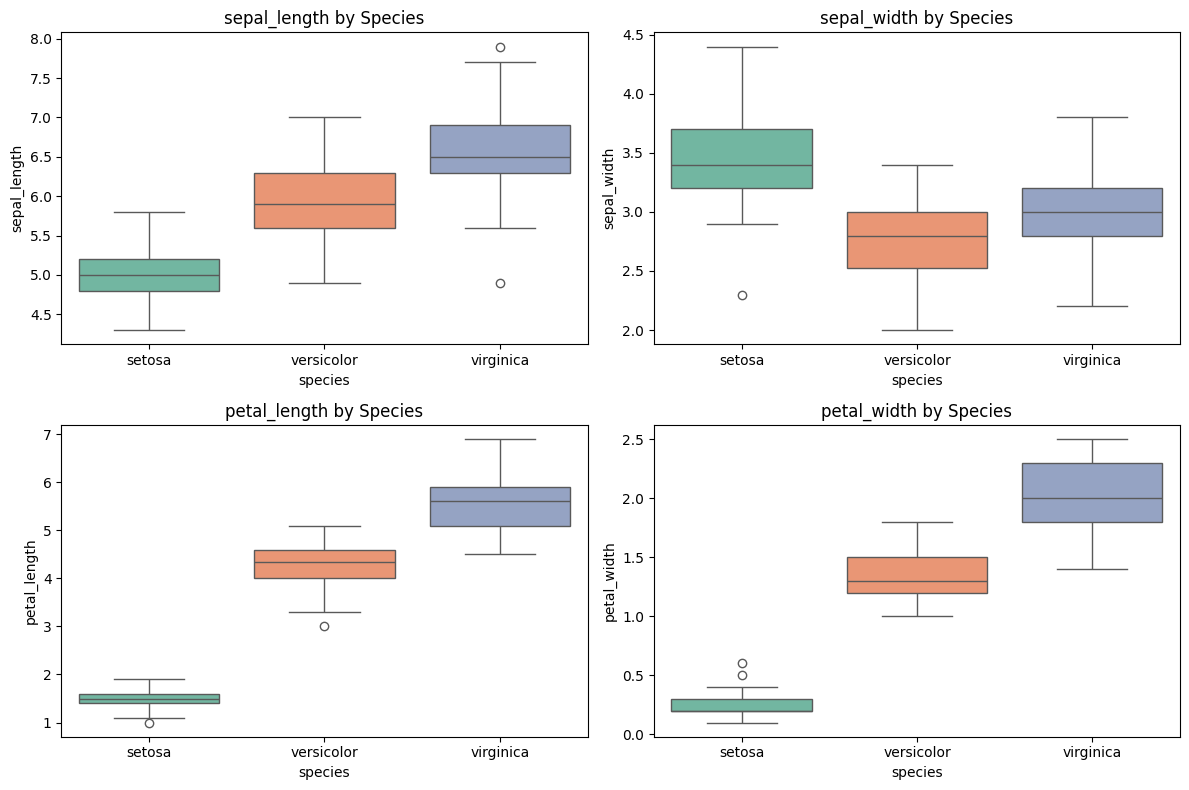

In [11]:
# Create boxplots for each feature grouped by species
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns[:-1], 1):  # skip 'species'
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"{col} by Species")

plt.tight_layout()

# Save plot
plt.savefig("../Task 2 - Exploratory Data Analysis (EDA)/Plots/boxplots_by_species.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

#### **Insights from Boxplots:**
- **Setosa** has consistently smaller petal length and width, with very low spread → easy to separate.  
- **Virginica** has the largest petals, while **Versicolor** lies in between → overlaps exist mainly between versicolor and virginica.  
- **Sepal** measurements show more overlap across species, making them less reliable for classification.  
- Outliers are visible in sepal width (especially setosa and virginica).  


## Task 2 — Exploratory Data Analysis (EDA) Summary

Through this exploratory analysis, we gained a deeper understanding of the Iris dataset:

- **Descriptive Statistics:** Computed mean, standard deviation, min, and max for each species, highlighting distinct patterns across classes.  
- **Correlation Analysis:** Strong positive correlation observed between petal length and petal width (r ≈ 0.96). Sepal dimensions showed weaker and sometimes negative correlations.  
- **Feature Distributions:** Histograms revealed clear separability of petal features across species, whereas sepal features exhibited significant overlap.  
- **Pairwise Relationships:** Pairplot visualizations confirmed that *setosa* is linearly separable from the other two classes, while *versicolor* and *virginica* overlap more closely.  
- **Boxplots:** Highlighted differences in spread and outliers, with petal measurements serving as stronger discriminators than sepal measurements.  

📌 **Key Takeaway:** Petal length and petal width are the most discriminative features for classifying Iris species, while sepal features are less informative. Outliers were identified but retained for analysis, as they provide insight into data variability.

This analysis establishes a solid foundation for further visualization and modeling in subsequent tasks.  